In [6]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# The code was removed by DSX for sharing.

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,...,183,184,185,186,187,188,189,190,191,192
0,1.000000,0.900208,0.880503,0.673423,0.677704,0.129032,0.062284,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
1,0.997764,0.919958,0.805031,0.675676,0.631347,0.206452,0.159170,1,0.272727,0.434783,...,0.675487,0.691069,0.701569,0.363226,0.450055,0.331382,0.711773,0.343537,0.808774,0.616340
2,0.996452,0.980249,0.440252,0.801802,0.779249,0.218280,0.156863,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
3,0.996452,0.977131,0.427673,0.774775,0.854305,0.246237,0.222607,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
4,0.995529,0.944906,0.786164,0.641892,0.635762,0.118280,0.071511,1,0.272727,0.434783,...,0.613546,0.546417,0.741318,0.444433,0.520374,0.323024,0.615110,0.295961,0.698293,0.475325


In [3]:
print "Variable definition and assignment:"

array_data_1 = df_data_1.values
y_data_1 = df_data_1.index

D =  array_data_1.shape[1]# number of features
K = array_data_1.shape[0] # number of classes
X = array_data_1
y = df_data_1.index
num_examples = array_data_1.shape[0]

print "Shape of input matrix X: " + str(X.shape)
print "Shape of target vector y: " + str(y.shape)
print "Number of target classes K: " + str(K)
print "Number of features D: " + str(D)
print "Number of samples num_samples: " + str(num_examples)

h = 150 # size of hidden layer, the new number of features per sample
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

print "Number of hidden units h: " + str(h)
print "Shape of the input-hidden weights matrix W: " + str(W.shape)
print "Shape of the input-hidden bias b: " + str(b.shape)
print "Shape of the hidden-output weights matrix W2: " + str(W2.shape)
print "Shape of the hidden-output bias b2: " + str(b2.shape)

Variable definition and assignment:
Shape of input matrix X: (651, 235)
Shape of target vector y: (651,)
Number of target classes K: 651
Number of features D: 235
Number of samples num_samples: 651
Number of hidden units h: 150
Shape of the input-hidden weights matrix W: (235, 150)
Shape of the input-hidden bias b: (1, 150)
Shape of the hidden-output weights matrix W2: (150, 651)
Shape of the hidden-output bias b2: (1, 651)


iteration 0: loss 6.485269
iteration 1000: loss 6.483875
iteration 2000: loss 6.482367
iteration 3000: loss 6.480078
iteration 4000: loss 6.476069
iteration 5000: loss 6.468234
iteration 6000: loss 6.452254
iteration 7000: loss 6.419826
iteration 8000: loss 6.358205
iteration 9000: loss 6.257355
iteration 10000: loss 6.128044
iteration 11000: loss 6.000514
iteration 12000: loss 5.889088
iteration 13000: loss 5.789135
iteration 14000: loss 5.693210
iteration 15000: loss 5.595939
iteration 16000: loss 5.495259
iteration 17000: loss 5.392655
iteration 18000: loss 5.292381
iteration 19000: loss 5.199359
iteration 20000: loss 5.116904
iteration 21000: loss 5.045905
iteration 22000: loss 4.985490
iteration 23000: loss 4.934049
iteration 24000: loss 4.889959
iteration 25000: loss 4.851708
iteration 26000: loss 4.818047
iteration 27000: loss 4.787988
iteration 28000: loss 4.760690
iteration 29000: loss 4.735505
iteration 30000: loss 4.711890
iteration 31000: loss 4.689417
iteration 32000: loss

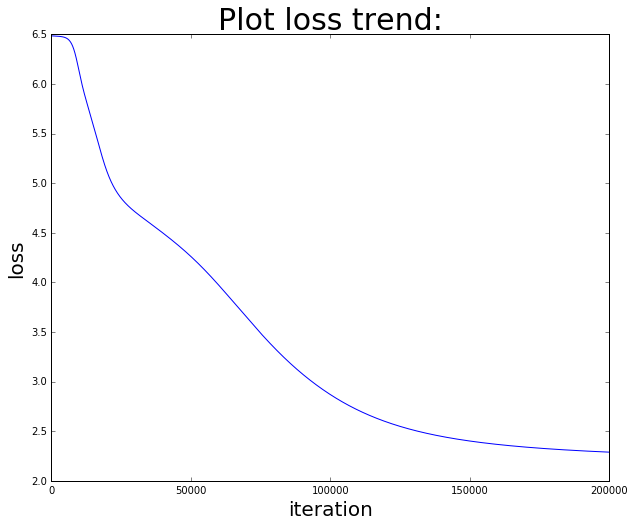

In [4]:
# some hyperparameters
step_size = 1e-2
reg = 1e-3 # regularization strength
training_losses = []

for i in xrange(200000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # computing for each sample the probability of being a certain sample
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    training_losses.append(loss)
    
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

plt.plot(training_losses)
plt.title("Plot loss trend:", fontsize=30)
plt.xlabel("iteration", fontsize=20)
plt.ylabel("loss", fontsize=20)

In [5]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.93


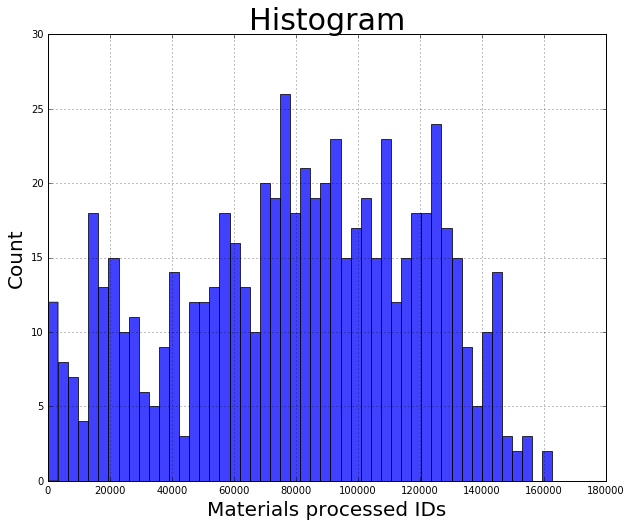

In [13]:
x = np.exp(12*df_data_1["Usura_mat_g"].values) - 1

plt.hist(x, 50, facecolor='blue', alpha=0.75)

plt.title('Histogram', fontsize=30)
plt.xlabel('Materials processed IDs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

plt.show()

In [17]:
print "Variable definition and assignment:"

X = df_data_1.values

num_feats =  array_data_1.shape[1]# number of features
num_samps = array_data_1.shape[0] # number of samples

print "Shape of input matrix X: " + str(X.shape)
print "Number of features D: " + str(D)
print "Number of samples num_samples: " + str(num_samps)

new_feats = int(num_feats*0.5) # New number of features
W_inp_hid_T = 0.01 * np.random.randn(num_feats,new_feats)
b_hid = np.zeros((1,new_feats))
W_hid_out_T = 0.01 * np.random.randn(new_feats,num_feats)
b_out = np.zeros((1,num_feats))

print "Number of hidden units h: " + str(new_feats)
print "Shape of the input-hidden weights matrix W: " + str(W_inp_hid_T.shape)
print "Shape of the hidden-output weights matrix W2: " + str(W_hid_out_T.shape)

Variable definition and assignment:
Shape of input matrix X: (651, 235)
Number of features D: 235
Number of samples num_samples: 651
Number of hidden units h: 117
Shape of the input-hidden weights matrix W: (235, 117)
Shape of the hidden-output weights matrix W2: (117, 235)


In [18]:
# some hyperparameters
step_size = 1e-2
reg = 1e-3 # regularization strength
training_losses = []

for i in xrange(200000):
    # NN activation
    hidden_layer = np.expit(-dot(X, W_inp_hid_T)-b_hid)
    scores = np.expit(-dot(hidden_layer, W_hid_out_T)-b_out)
  
    # compute the loss: MSE
    err = np.sqrt(np.sum((scores-X)**2, axis=1))
    data_loss = np.sum(err**2)/(2*num_samp)
    reg_loss = 0.5*reg*(np.sum(W_inp_hid**2) + np.sum(b_inp**2)) + 0.5*reg*(np.sum(W_hid_out**2) + np.sum(b_hid**2))
    loss = data_loss + reg_loss
    training_losses.append(loss)
    
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = scores*(1-scores)*(X-scores)
    W_hid_out_T += step_size*np.dot(hidden_layer.T, dscores)
    b_out += step_size
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

plt.plot(training_losses)
plt.title("Plot loss trend:", fontsize=30)
plt.xlabel("iteration", fontsize=20)
plt.ylabel("loss", fontsize=20)

SyntaxError: invalid syntax (<ipython-input-18-a0d99ed97a2d>, line 15)

In [ ]:
dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2